In [1]:
import matplotlib.pyplot as plt

In [2]:
import findspark
import timeit
findspark.init("/u/cs451/packages/spark")
from pyspark.sql import SparkSession
import random
spark = SparkSession.builder.appName("Project").master("local[2]").config('spark.ui.port', random.randrange(4000,5000)).getOrCreate()
from pyspark.sql import SQLContext
sc = spark.sparkContext
sqlcontext = SQLContext(sc)

In [3]:
import pandas as pd
from pyspark.sql.types import IntegerType, FloatType
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [4]:
def performPreProcessing(df):  
    #casting year, month and day to integer values
    df = df.withColumn("year", df["year"].cast(IntegerType()))
    df = df.withColumn("mo", df["mo"].cast(IntegerType()))
    df = df.withColumn("da", df["da"].cast(IntegerType()))
    df = df.withColumn("temp", df["temp"].cast(FloatType()))
    df = df.withColumn("slp", df["slp"].cast(FloatType()))
    df = df.withColumn("stp", df["stp"].cast(FloatType()))
    df = df.withColumn("wdsp", df["wdsp"].cast(FloatType()))
    df = df.withColumn("mxpsd", df["mxpsd"].cast(FloatType()))
    df = df.withColumn("max", df["max"].cast(FloatType()))
    df = df.withColumn("min", df["min"].cast(FloatType()))
    return df

In [5]:
def load_datasets_and_set_views():
    global stations, gsod_data_2009, gsod_data_2010, gsod_data_2011, gsod_data_2012, gsod_data_2013, gsod_data_2014, gsod_data_2015, gsod_data_2016, gsod_data_2017, gsod_data_2018, gsod_data_2019

    gsod_data_2009 = spark.read.format("csv").option("header", "true").load("/tmp/Project/gsod2009.txt").cache()
#     gsod_data_2009=performPreProcessing(gsod_data_2009)
    gsod_data_2009.createOrReplaceTempView("gsod_data_2009")

    gsod_data_2010 = spark.read.format("csv").option("header", "true").load("/tmp/Project/gsod2010.txt").cache()
#     gsod_data_2010 = performPreProcessing(gsod_data_2010)
    gsod_data_2010.createOrReplaceTempView("gsod_data_2010")

    gsod_data_2011 = spark.read.format("csv").option("header", "true").load("/tmp/Project/gsod2011.txt").cache()
#     gsod_data_2011 =performPreProcessing(gsod_data_2011)
    gsod_data_2011.createOrReplaceTempView("gsod_data_2011")

    gsod_data_2012 = spark.read.format("csv").option("header", "true").load("/tmp/Project/gsod2012.txt").cache()
#     gsod_data_2012 =performPreProcessing(gsod_data_2012)
    gsod_data_2012.createOrReplaceTempView("gsod_data_2012")

    gsod_data_2013 = spark.read.format("csv").option("header", "true").load("/tmp/Project/gsod2013.txt").cache()
#     gsod_data_2013 =performPreProcessing(gsod_data_2013)
    gsod_data_2013.createOrReplaceTempView("gsod_data_2013")

    gsod_data_2014 = spark.read.format("csv").option("header", "true").load("/tmp/Project/gsod2014.txt").cache()
#     gsod_data_2014 =performPreProcessing(gsod_data_2014)
    gsod_data_2014.createOrReplaceTempView("gsod_data_2014")

    gsod_data_2015 = spark.read.format("csv").option("header", "true").load("/tmp/Project/gsod2015.txt").cache()
#     gsod_data_2015 =performPreProcessing(gsod_data_2015)
    gsod_data_2015.createOrReplaceTempView("gsod_data_2015")

    gsod_data_2016 = spark.read.format("csv").option("header", "true").load("/tmp/Project/gsod2016.txt").cache()
#     gsod_data_2016 =performPreProcessing(gsod_data_2016)
    gsod_data_2016.createOrReplaceTempView("gsod_data_2016")

    gsod_data_2017 = spark.read.format("csv").option("header", "true").load("/tmp/Project/gsod2017.txt").cache()
#     gsod_data_2017 =performPreProcessing(gsod_data_2017)
    gsod_data_2017.createOrReplaceTempView("gsod_data_2017")

    gsod_data_2018 = spark.read.format("csv").option("header", "true").load("/tmp/Project/gsod2018.txt").cache()
#     gsod_data_2018 =performPreProcessing(gsod_data_2018)
    gsod_data_2018.createOrReplaceTempView("gsod_data_2018")

    gsod_data_2019 = spark.read.format("csv").option("header", "true").load("/tmp/Project/gsod2019.txt").cache()
#     gsod_data_2019 =performPreProcessing(gsod_data_2019)
    gsod_data_2019.createOrReplaceTempView("gsod_data_2019")

    stations = spark.read.format("csv").option("header", "true").load("/tmp/Project/stations.txt").cache()
    stations.createOrReplaceTempView("stations")

    print("done")

In [6]:
load_datasets_and_set_views()

done


In [7]:
gsod_data_2009.show()

+------+-----+----+---+---+----+----------+------+----------+------+---------+------+---------+-----+-----------+----+----------+-----+-----+----+--------+----+--------+-----+---------+-----+---+------------+----------------+----+-------+--------------------+
|   stn| wban|year| mo| da|temp|count_temp|  dewp|count_dewp|   slp|count_slp|   stp|count_stp|visib|count_visib|wdsp|count_wdsp|mxpsd| gust| max|flag_max| min|flag_min| prcp|flag_prcp| sndp|fog|rain_drizzle|snow_ice_pellets|hail|thunder|tornado_funnel_cloud|
+------+-----+----+---+---+----+----------+------+----------+------+---------+------+---------+-----+-----------+----+----------+-----+-----+----+--------+----+--------+-----+---------+-----+---+------------+----------------+----+-------+--------------------+
|373080|99999|2009| 01| 04|30.8|         4|9999.9|         0|9999.9|        0|9999.9|        0|999.9|          0| 1.5|         4|  5.8|999.9|32.4|       *|28.4|    null|99.99|     null|999.9|  0|           0|            

In [8]:
gsod_data_2009.dtypes

[('stn', 'string'),
 ('wban', 'string'),
 ('year', 'string'),
 ('mo', 'string'),
 ('da', 'string'),
 ('temp', 'string'),
 ('count_temp', 'string'),
 ('dewp', 'string'),
 ('count_dewp', 'string'),
 ('slp', 'string'),
 ('count_slp', 'string'),
 ('stp', 'string'),
 ('count_stp', 'string'),
 ('visib', 'string'),
 ('count_visib', 'string'),
 ('wdsp', 'string'),
 ('count_wdsp', 'string'),
 ('mxpsd', 'string'),
 ('gust', 'string'),
 ('max', 'string'),
 ('flag_max', 'string'),
 ('min', 'string'),
 ('flag_min', 'string'),
 ('prcp', 'string'),
 ('flag_prcp', 'string'),
 ('sndp', 'string'),
 ('fog', 'string'),
 ('rain_drizzle', 'string'),
 ('snow_ice_pellets', 'string'),
 ('hail', 'string'),
 ('thunder', 'string'),
 ('tornado_funnel_cloud', 'string')]

In [51]:
month="02"
country="US"

In [52]:
query_2009=spark.sql("SELECT s.country, g.stn, g.year, g.mo, g.da, g.temp, g.slp, g.stp, g.wdsp, g.mxpsd, g.max, g.min, g.rain_drizzle FROM gsod_data_2009 g, stations s where s.usaf=g.stn AND g.mo={0} AND s.country='{1}' AND g.slp!=9999.9 AND g.stp!=9999.9 AND g.wdsp!=999.9 AND g.mxpsd!=999.9 AND g.max!=9999.9 AND g.min!=9999.9".format(month,country))

query_2010=spark.sql("SELECT s.country, g.stn, g.year, g.mo, g.da, g.temp, g.slp, g.stp, g.wdsp, g.mxpsd, g.max, g.min, g.rain_drizzle FROM gsod_data_2010 g, stations s where s.usaf=g.stn AND g.mo={0} AND s.country='{1}' AND g.slp!=9999.9 AND g.stp!=9999.9 AND g.wdsp!=999.9 AND g.mxpsd!=999.9 AND g.max!=9999.9 AND g.min!=9999.9".format(month,country))

query_2011=spark.sql("SELECT s.country, g.stn, g.year, g.mo, g.da, g.temp, g.slp, g.stp, g.wdsp, g.mxpsd, g.max, g.min, g.rain_drizzle FROM gsod_data_2011 g, stations s where s.usaf=g.stn AND g.mo={0} AND s.country='{1}' AND g.slp!=9999.9 AND g.stp!=9999.9 AND g.wdsp!=999.9 AND g.mxpsd!=999.9 AND g.max!=9999.9 AND g.min!=9999.9".format(month,country))

query_2012=spark.sql("SELECT s.country, g.stn, g.year, g.mo, g.da, g.temp, g.slp, g.stp, g.wdsp, g.mxpsd, g.max, g.min, g.rain_drizzle FROM gsod_data_2012 g, stations s where s.usaf=g.stn AND g.mo={0} AND s.country='{1}' AND g.slp!=9999.9 AND g.stp!=9999.9 AND g.wdsp!=999.9 AND g.mxpsd!=999.9 AND g.max!=9999.9 AND g.min!=9999.9".format(month,country))

query_2013=spark.sql("SELECT s.country, g.stn, g.year, g.mo, g.da, g.temp, g.slp, g.stp, g.wdsp, g.mxpsd, g.max, g.min, g.rain_drizzle FROM gsod_data_2013 g, stations s where s.usaf=g.stn AND g.mo={0} AND s.country='{1}' AND g.slp!=9999.9 AND g.stp!=9999.9 AND g.wdsp!=999.9 AND g.mxpsd!=999.9 AND g.max!=9999.9 AND g.min!=9999.9".format(month,country))

query_2014=spark.sql("SELECT s.country, g.stn, g.year, g.mo, g.da, g.temp, g.slp, g.stp, g.wdsp, g.mxpsd, g.max, g.min, g.rain_drizzle FROM gsod_data_2014 g, stations s where s.usaf=g.stn AND g.mo={0} AND s.country='{1}' AND g.slp!=9999.9 AND g.stp!=9999.9 AND g.wdsp!=999.9 AND g.mxpsd!=999.9 AND g.max!=9999.9 AND g.min!=9999.9".format(month,country))

query_2015=spark.sql("SELECT s.country, g.stn, g.year, g.mo, g.da, g.temp, g.slp, g.stp, g.wdsp, g.mxpsd, g.max, g.min, g.rain_drizzle FROM gsod_data_2015 g, stations s where s.usaf=g.stn AND g.mo={0} AND s.country='{1}' AND g.slp!=9999.9 AND g.stp!=9999.9 AND g.wdsp!=999.9 AND g.mxpsd!=999.9 AND g.max!=9999.9 AND g.min!=9999.9".format(month,country))

query_2016=spark.sql("SELECT s.country, g.stn, g.year, g.mo, g.da, g.temp, g.slp, g.stp, g.wdsp, g.mxpsd, g.max, g.min, g.rain_drizzle FROM gsod_data_2016 g, stations s where s.usaf=g.stn AND g.mo={0} AND s.country='{1}' AND g.slp!=9999.9 AND g.stp!=9999.9 AND g.wdsp!=999.9 AND g.mxpsd!=999.9 AND g.max!=9999.9 AND g.min!=9999.9".format(month,country))

query_2017=spark.sql("SELECT s.country, g.stn, g.year, g.mo, g.da, g.temp, g.slp, g.stp, g.wdsp, g.mxpsd, g.max, g.min, g.rain_drizzle FROM gsod_data_2017 g, stations s where s.usaf=g.stn AND g.mo={0} AND s.country='{1}' AND g.slp!=9999.9 AND g.stp!=9999.9 AND g.wdsp!=999.9 AND g.mxpsd!=999.9 AND g.max!=9999.9 AND g.min!=9999.9".format(month,country))

query_2018=spark.sql("SELECT s.country, g.stn, g.year, g.mo, g.da, g.temp, g.slp, g.stp, g.wdsp, g.mxpsd, g.max, g.min, g.rain_drizzle FROM gsod_data_2018 g, stations s where s.usaf=g.stn AND g.mo={0} AND s.country='{1}' AND g.slp!=9999.9 AND g.stp!=9999.9 AND g.wdsp!=999.9 AND g.mxpsd!=999.9 AND g.max!=9999.9 AND g.min!=9999.9".format(month,country))

query_2019=spark.sql("SELECT s.country, g.stn, g.year, g.mo, g.da, g.temp, g.slp, g.stp, g.wdsp, g.mxpsd, g.max, g.min, g.rain_drizzle FROM gsod_data_2019 g, stations s where s.usaf=g.stn AND g.mo={0} AND s.country='{1}' AND g.slp!=9999.9 AND g.stp!=9999.9 AND g.wdsp!=999.9 AND g.mxpsd!=999.9 AND g.max!=9999.9 AND g.min!=9999.9".format(month,country))

In [53]:
query_2009 =performPreProcessing(query_2009)
query_2010 =performPreProcessing(query_2010)
query_2011 =performPreProcessing(query_2011)
query_2012 =performPreProcessing(query_2012)
query_2013 =performPreProcessing(query_2013)
query_2014 =performPreProcessing(query_2014)
query_2015 =performPreProcessing(query_2015)
query_2016 =performPreProcessing(query_2016)
query_2017 =performPreProcessing(query_2017)
query_2018 =performPreProcessing(query_2018)

In [54]:
query_2009.dtypes

[('country', 'string'),
 ('stn', 'string'),
 ('year', 'int'),
 ('mo', 'int'),
 ('da', 'int'),
 ('temp', 'float'),
 ('slp', 'float'),
 ('stp', 'float'),
 ('wdsp', 'float'),
 ('mxpsd', 'float'),
 ('max', 'float'),
 ('min', 'float'),
 ('rain_drizzle', 'string')]

In [64]:
df_all=query_2009.union(query_2010)\
                .union(query_2011)\
                .union(query_2012)\
                .union(query_2013)\
                .union(query_2014)\
                .union(query_2015)\
                .union(query_2016)\
                .union(query_2017)\
                .union(query_2018)\
                .union(query_2019)

In [65]:
##Monthly Average Temperature
df_min=df_all.groupBy('stn').agg({'temp':'min'})
df_max=df_all.groupBy('stn').agg({'temp':'max'})
df_avg=df_all.groupBy('stn').agg({'temp':'avg'})
# df_all.show()

In [66]:
numeric_features = [t[0] for t in df_all.dtypes if (t[1] == 'float')]
print(numeric_features)
df_all.select(numeric_features).describe().toPandas().transpose()


[]


,0,1,2,3,4
summary,count,mean,stddev,min,max


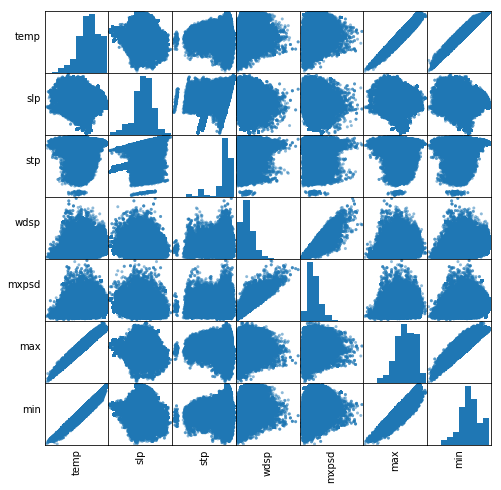

In [15]:
import pandas as pd
from pandas.plotting import scatter_matrix
numeric_data = df_all.select(numeric_features).toPandas()
axs = scatter_matrix(numeric_data, figsize=(8, 8))
n = len(numeric_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

### Feature Selection for Classification

In [67]:
from pyspark.sql.functions import col
feat_cols=[ 'year', 'mo', 'da', 'temp', 'slp', 'stp', 'wdsp', 'mxpsd']
# dataset=sqlcontext.sql("SELECT g.year, g.mo, g.da, g.temp, g.slp, g.stp, g.wdsp, g.mxpsd, g.max, g.min, g.rain_drizzle FROM gsod_data_2018 g")
dataset=df_all
dataset=dataset.select(*(col(c).cast("double").alias(c) for c in dataset.columns))

In [68]:
vec_assembler=VectorAssembler(inputCols= feat_cols,outputCol='features')
final_data=vec_assembler.transform(dataset)
final_data=final_data.select(['features','rain_drizzle'])
training_data,test_data=final_data.randomSplit([0.75,0.25])

In [69]:
print("Number of Training Instances",training_data.filter(training_data.rain_drizzle==0).count())
print("Number of Testing Instances",test_data.filter(test_data.rain_drizzle==0).count())

('Number of Training Instances', 2612197)
('Number of Testing Instances', 871057)


In [70]:
print("Number of Training Instances",training_data.filter(training_data.rain_drizzle==1).count())
print("Number of Testing Instances",test_data.filter(test_data.rain_drizzle==1).count())

('Number of Training Instances', 1144698)
('Number of Testing Instances', 380588)


### Feature Selection for Regression

In [17]:
from pyspark.sql.functions import col
feat_cols_reg=[ 'year', 'mo', 'da', 'slp', 'stp', 'wdsp', 'mxpsd']
# dataset=sqlcontext.sql("SELECT g.year, g.mo, g.da, g.temp, g.slp, g.stp, g.wdsp, g.mxpsd, g.max, g.min, g.rain_drizzle FROM gsod_data_2018 g")
dataset_reg=df_all

dataset_reg=dataset_reg.select(*(col(c).cast("double").alias(c) for c in dataset_reg.columns))

In [18]:
vec_assembler_reg=VectorAssembler(inputCols= feat_cols,outputCol='features')
final_data_reg=vec_assembler_reg.transform(dataset_reg)
final_data_reg=final_data_reg.select(['features','temp'])
training_data_reg,test_data_reg=final_data_reg.randomSplit([0.75,0.25])

### Linear Regression

In [20]:
from pyspark.ml.regression import LinearRegression


lr = LinearRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8,labelCol='temp')

# Fit the model
lrModel = lr.fit(training_data_reg)

# Print the coefficients and intercept for linear regression
print("Coefficients: %s" % str(lrModel.coefficients))
print("Intercept: %s" % str(lrModel.intercept))

# Summarize the model over the training set and print out some metrics
trainingSummary = lrModel.summary
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

Coefficients: [0.0,0.0,0.0,0.4242806979280192,0.0,0.0,0.0,0.0,0.2319636698644939,0.3288597998695074]
Intercept: 0.980571992149
numIterations: 11
objectiveHistory: [0.5, 0.3384313292375492, 0.014044855327804523, 0.012745774055741071, 0.011740114110577453, 0.011668312784180089, 0.011653565681038706, 0.011530110451333085, 0.011499121944243232, 0.011495483571059546, 0.011436010283202343]
+--------------------+
|           residuals|
+--------------------+
|-0.02677222621852...|
|-0.02677222621852...|
|-0.35011172384006795|
|-0.35011172384006795|
|   -1.21308953285671|
|   -1.21308953285671|
|-0.08701712152488916|
|-0.08701712152488916|
|  1.8908034884505325|
| -0.3043145384817656|
| -0.3043145384817656|
| -1.0639221624583026|
|  0.3013116129934321|
|  0.3013116129934321|
|-0.06154434678029297|
| -0.8909703545716869|
| -0.8909703545716869|
|  2.6945468805796366|
|-0.44209709126652186|
|  0.8432061632125567|
+--------------------+
only showing top 20 rows

RMSE: 0.964785
r2: 0.998316


## Multilayer Perceptron Classifier

In [43]:
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [44]:
# specify layers for the neural network:
# input layer of size 10 (features), two intermediate of size 5 and 4
# and output of size 2 (classes)
layers = [10, 100, 100, 50, 50, 10, 2]


In [45]:
# create the trainer and set its parameters
trainer = MultilayerPerceptronClassifier(maxIter=100, layers=layers, blockSize=128, seed=1234, labelCol='rain_drizzle')

# train the model
model = trainer.fit(training_data)


Py4JJavaError: An error occurred while calling o2641.fit.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 1 in stage 712.0 failed 1 times, most recent failure: Lost task 1.0 in stage 712.0 (TID 3833, localhost, executor driver): java.lang.ArrayIndexOutOfBoundsException
	at java.lang.System.arraycopy(Native Method)
	at org.apache.spark.ml.ann.DataStacker$$anonfun$5$$anonfun$apply$3$$anonfun$apply$4.apply(Layer.scala:665)
	at org.apache.spark.ml.ann.DataStacker$$anonfun$5$$anonfun$apply$3$$anonfun$apply$4.apply(Layer.scala:664)
	at scala.collection.immutable.List.foreach(List.scala:381)
	at org.apache.spark.ml.ann.DataStacker$$anonfun$5$$anonfun$apply$3.apply(Layer.scala:664)
	at org.apache.spark.ml.ann.DataStacker$$anonfun$5$$anonfun$apply$3.apply(Layer.scala:660)
	at scala.collection.Iterator$$anon$11.next(Iterator.scala:409)
	at scala.collection.Iterator$$anon$11.next(Iterator.scala:409)
	at org.apache.spark.storage.memory.MemoryStore.putIteratorAsValues(MemoryStore.scala:217)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:1092)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:1083)
	at org.apache.spark.storage.BlockManager.doPut(BlockManager.scala:1018)
	at org.apache.spark.storage.BlockManager.doPutIterator(BlockManager.scala:1083)
	at org.apache.spark.storage.BlockManager.getOrElseUpdate(BlockManager.scala:809)
	at org.apache.spark.rdd.RDD.getOrCompute(RDD.scala:335)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:286)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:87)
	at org.apache.spark.scheduler.Task.run(Task.scala:109)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:345)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1602)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1590)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1589)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1589)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:831)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:831)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:831)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1823)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1772)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1761)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:642)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2034)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2055)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2074)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2099)
	at org.apache.spark.rdd.RDD.count(RDD.scala:1162)
	at org.apache.spark.mllib.optimization.LBFGS$.runLBFGS(LBFGS.scala:195)
	at org.apache.spark.mllib.optimization.LBFGS.optimize(LBFGS.scala:142)
	at org.apache.spark.ml.ann.FeedForwardTrainer.train(Layer.scala:854)
	at org.apache.spark.ml.classification.MultilayerPerceptronClassifier.train(MultilayerPerceptronClassifier.scala:266)
	at org.apache.spark.ml.classification.MultilayerPerceptronClassifier.train(MultilayerPerceptronClassifier.scala:143)
	at org.apache.spark.ml.Predictor.fit(Predictor.scala:118)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)
Caused by: java.lang.ArrayIndexOutOfBoundsException
	at java.lang.System.arraycopy(Native Method)
	at org.apache.spark.ml.ann.DataStacker$$anonfun$5$$anonfun$apply$3$$anonfun$apply$4.apply(Layer.scala:665)
	at org.apache.spark.ml.ann.DataStacker$$anonfun$5$$anonfun$apply$3$$anonfun$apply$4.apply(Layer.scala:664)
	at scala.collection.immutable.List.foreach(List.scala:381)
	at org.apache.spark.ml.ann.DataStacker$$anonfun$5$$anonfun$apply$3.apply(Layer.scala:664)
	at org.apache.spark.ml.ann.DataStacker$$anonfun$5$$anonfun$apply$3.apply(Layer.scala:660)
	at scala.collection.Iterator$$anon$11.next(Iterator.scala:409)
	at scala.collection.Iterator$$anon$11.next(Iterator.scala:409)
	at org.apache.spark.storage.memory.MemoryStore.putIteratorAsValues(MemoryStore.scala:217)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:1092)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:1083)
	at org.apache.spark.storage.BlockManager.doPut(BlockManager.scala:1018)
	at org.apache.spark.storage.BlockManager.doPutIterator(BlockManager.scala:1083)
	at org.apache.spark.storage.BlockManager.getOrElseUpdate(BlockManager.scala:809)
	at org.apache.spark.rdd.RDD.getOrCompute(RDD.scala:335)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:286)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:87)
	at org.apache.spark.scheduler.Task.run(Task.scala:109)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:345)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more


In [ ]:
pred_train = model.transform(training_data)
predictions = model.transform(test_data)

In [ ]:
pred_train = model.transform(training_data)
from pyspark.ml.evaluation import BinaryClassificationEvaluator,MulticlassClassificationEvaluator
# Evaluate model
# evaluator = BinaryClassificationEvaluator(labelCol='rain_drizzle')
# print("Area under ROC Curve-Training Data",evaluator.evaluate(pred_train))

evaluator = BinaryClassificationEvaluator(labelCol='rain_drizzle',metricName="areaUnderPR")
print("Area under PR Curve-Training Data",evaluator.evaluate(pred_train))

evaluator2=MulticlassClassificationEvaluator(labelCol='rain_drizzle',metricName="f1")
print("F1 Score-Training Data",evaluator2.evaluate(pred_train))


evaluator3=MulticlassClassificationEvaluator(labelCol='rain_drizzle',metricName="accuracy")
print("Accuracy Score-Training Data",evaluator3.evaluate(pred_train))

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator,MulticlassClassificationEvaluator
# Evaluate model
# evaluator = BinaryClassificationEvaluator(labelCol='rain_drizzle')
# print("Area under ROC Curve-Test Data",evaluator.evaluate(predictions))

evaluator = BinaryClassificationEvaluator(labelCol='rain_drizzle',metricName="areaUnderPR")
print("Area under PR Curve-Test Data",evaluator.evaluate(predictions))

evaluator2=MulticlassClassificationEvaluator(labelCol='rain_drizzle',metricName="f1")
print("F1 Score-Test Data",evaluator2.evaluate(predictions))


evaluator3=MulticlassClassificationEvaluator(labelCol='rain_drizzle',metricName="accuracy")
print("Accuracy Score-Test Data",evaluator3.evaluate(predictions))

## Linear SVM

In [24]:
from pyspark.ml.classification import LinearSVC
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# # Load training data
# training = spark.read.format("libsvm").load("data/mllib/sample_libsvm_data.txt")

lsvc = LinearSVC(maxIter=10, regParam=0.1,labelCol='rain_drizzle')

# Fit the model
lsvcModel = lsvc.fit(training_data)

# Print the coefficients and intercept for linear SVC
print("Coefficients: " + str(lsvcModel.coefficients))
print("Intercept: " + str(lsvcModel.intercept))

Coefficients: [-0.0005318301334763921,0.0,9.878003824479624e-06,0.0007167343983643146,1.5011599821789247e-05,-4.519301997590261e-06,0.002168636339084674,0.002196523648691568]
Intercept: -2.50586274023e-08


In [25]:
pred_train = lsvcModel.transform(training_data)
from pyspark.ml.evaluation import BinaryClassificationEvaluator,MulticlassClassificationEvaluator
# # Evaluate model
# evaluator = BinaryClassificationEvaluator(labelCol='rain_drizzle')
# print("Area under ROC Curve-Training Data",evaluator.evaluate(pred_train))

evaluator = BinaryClassificationEvaluator(labelCol='rain_drizzle',metricName="areaUnderPR")
print("Area under PR Curve-Training Data",evaluator.evaluate(pred_train))

evaluator2=MulticlassClassificationEvaluator(labelCol='rain_drizzle',metricName="f1")
print("F1 Score-Training Data",evaluator2.evaluate(pred_train))


evaluator3=MulticlassClassificationEvaluator(labelCol='rain_drizzle',metricName="accuracy")
print("Accuracy Score-Training Data",evaluator3.evaluate(pred_train))

('Area under PR Curve-Training Data', 0.4708411223241299)
('F1 Score-Training Data', 0.5347863930467649)
('Accuracy Score-Training Data', 0.6678014352648123)


In [26]:
predictions = lsvcModel.transform(test_data)

from pyspark.ml.evaluation import BinaryClassificationEvaluator,MulticlassClassificationEvaluator
# # Evaluate model
# evaluator = BinaryClassificationEvaluator(labelCol='rain_drizzle')
# print("Area under ROC Curve-Test Data",evaluator.evaluate(predictions))

evaluator = BinaryClassificationEvaluator(labelCol='rain_drizzle',metricName="areaUnderPR")
print("Area under PR Curve-Test Data",evaluator.evaluate(predictions))

evaluator2=MulticlassClassificationEvaluator(labelCol='rain_drizzle',metricName="f1")
print("F1 Score-Test Data",evaluator2.evaluate(predictions))


evaluator3=MulticlassClassificationEvaluator(labelCol='rain_drizzle',metricName="accuracy")
print("Accuracy Score-Test Data",evaluator3.evaluate(predictions))

('Area under PR Curve-Test Data', 0.4740357456813543)
('F1 Score-Test Data', 0.5337462342792507)
('Accuracy Score-Test Data', 0.6669892104258225)


## Decision Tree

In [27]:
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol='features',labelCol='rain_drizzle', maxDepth=3)

In [28]:
dtModel=dt.fit(training_data)


In [29]:
print("numNodes = ", dtModel.numNodes)
print("depth = ", dtModel.depth)

('numNodes = ', 15)
('depth = ', 3)


In [30]:
# display(dtModel)

In [31]:
predictions = dtModel.transform(test_data)


In [32]:
pred_train=dtModel.transform(training_data)

In [33]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator,MulticlassClassificationEvaluator
# Evaluate model
# evaluator = BinaryClassificationEvaluator(labelCol='rain_drizzle')
# print("Area under ROC Curve-Training Data",evaluator.evaluate(pred_train))

evaluator = BinaryClassificationEvaluator(labelCol='rain_drizzle',metricName="areaUnderPR")
print("Area under PR Curve-Training Data",evaluator.evaluate(pred_train))

evaluator2=MulticlassClassificationEvaluator(labelCol='rain_drizzle',metricName="f1")
print("F1 Score-Training Data",evaluator2.evaluate(pred_train))


evaluator3=MulticlassClassificationEvaluator(labelCol='rain_drizzle',metricName="accuracy")
print("Accuracy Score-Training Data",evaluator3.evaluate(pred_train))

('Area under PR Curve-Training Data', 0.6163294835755881)
('F1 Score-Training Data', 0.7011086960654244)
('Accuracy Score-Training Data', 0.7340198737268899)


In [34]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator,MulticlassClassificationEvaluator
# Evaluate model
# evaluator = BinaryClassificationEvaluator(labelCol='rain_drizzle')
# print("Area under ROC Curve-Test Data",evaluator.evaluate(predictions))

evaluator = BinaryClassificationEvaluator(labelCol='rain_drizzle',metricName="areaUnderPR")
print("Area under PR Curve-Test Data",evaluator.evaluate(predictions))

evaluator2=MulticlassClassificationEvaluator(labelCol='rain_drizzle',metricName="f1")
print("F1 Score-Test Data",evaluator2.evaluate(predictions))


evaluator3=MulticlassClassificationEvaluator(labelCol='rain_drizzle',metricName="accuracy")
print("Accuracy Score-Test Data",evaluator3.evaluate(predictions))

('Area under PR Curve-Test Data', 0.6163714020196873)
('F1 Score-Test Data', 0.7004797976811595)
('Accuracy Score-Test Data', 0.733124704694468)


## Random Forest

In [35]:
from pyspark.ml.classification import RandomForestClassifier

In [36]:
rf = RandomForestClassifier(featuresCol='features',labelCol='rain_drizzle')

In [37]:
rfModel = rf.fit(training_data)
predictions = rfModel.transform(test_data)
pred_train=dtModel.transform(training_data)

In [38]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator,MulticlassClassificationEvaluator
# Evaluate model
# evaluator = BinaryClassificationEvaluator(labelCol='rain_drizzle')
# print("Area under ROC Curve-Training Data",evaluator.evaluate(pred_train))

evaluator = BinaryClassificationEvaluator(labelCol='rain_drizzle',metricName="areaUnderPR")
print("Area under PR Curve-Training Data",evaluator.evaluate(pred_train))

evaluator2=MulticlassClassificationEvaluator(labelCol='rain_drizzle',metricName="f1")
print("F1 Score-Training Data",evaluator2.evaluate(pred_train))


evaluator3=MulticlassClassificationEvaluator(labelCol='rain_drizzle',metricName="accuracy")
print("Accuracy Score-Training Data",evaluator3.evaluate(pred_train))

('Area under PR Curve-Training Data', 0.6163294835755881)
('F1 Score-Training Data', 0.7011086960654244)
('Accuracy Score-Training Data', 0.7340198737268899)


In [39]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator,MulticlassClassificationEvaluator
# Evaluate model
# evaluator = BinaryClassificationEvaluator(labelCol='rain_drizzle')
# print("Area under ROC Curve-Test Data",evaluator.evaluate(predictions))

evaluator = BinaryClassificationEvaluator(labelCol='rain_drizzle',metricName="areaUnderPR")
print("Area under PR Curve-Test Data",evaluator.evaluate(predictions))

evaluator2=MulticlassClassificationEvaluator(labelCol='rain_drizzle',metricName="f1")
print("F1 Score-Test Data",evaluator2.evaluate(predictions))


evaluator3=MulticlassClassificationEvaluator(labelCol='rain_drizzle',metricName="accuracy")
print("Accuracy Score-Test Data",evaluator3.evaluate(predictions))

('Area under PR Curve-Test Data', 0.7786483506856033)
('F1 Score-Test Data', 0.7984777627735128)
('Accuracy Score-Test Data', 0.805127474903075)


## Gradient Boost Classifier

In [40]:
from pyspark.ml.classification import GBTClassifier
gbt = GBTClassifier(featuresCol='features',labelCol='rain_drizzle',maxIter=10)
gbtModel = gbt.fit(training_data)
predictions = gbtModel.transform(test_data)
pred_train=dtModel.transform(training_data)

In [41]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator,MulticlassClassificationEvaluator
# Evaluate model
# evaluator = BinaryClassificationEvaluator(labelCol='rain_drizzle')
# print("Area under ROC Curve-Training Data",evaluator.evaluate(pred_train))

evaluator = BinaryClassificationEvaluator(labelCol='rain_drizzle',metricName="areaUnderPR")
print("Area under PR Curve-Training Data",evaluator.evaluate(pred_train))

evaluator2=MulticlassClassificationEvaluator(labelCol='rain_drizzle',metricName="f1")
print("F1 Score-Training Data",evaluator2.evaluate(pred_train))


evaluator3=MulticlassClassificationEvaluator(labelCol='rain_drizzle',metricName="accuracy")
print("Accuracy Score-Training Data",evaluator3.evaluate(pred_train))

('Area under PR Curve-Training Data', 0.6163294835755881)
('F1 Score-Training Data', 0.7011086960654244)
('Accuracy Score-Training Data', 0.7340198737268899)


In [49]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator,MulticlassClassificationEvaluator
# Evaluate model
# evaluator = BinaryClassificationEvaluator(labelCol='rain_drizzle')
# print("Area under ROC Curve-Test Data",evaluator.evaluate(predictions))

evaluator = BinaryClassificationEvaluator(labelCol='rain_drizzle',metricName="areaUnderPR")
print("Area under PR Curve-Test Data",evaluator.evaluate(predictions))

evaluator2=MulticlassClassificationEvaluator(labelCol='rain_drizzle',metricName="f1")
print("F1 Score-Test Data",evaluator2.evaluate(predictions))


evaluator3=MulticlassClassificationEvaluator(labelCol='rain_drizzle',metricName="accuracy")
print("Accuracy Score-Test Data",evaluator3.evaluate(predictions))

('Area under PR Curve-Test Data', 0.8776048037335591)
('F1 Score-Test Data', 0.9366021195731454)
('Accuracy Score-Test Data', 0.9363984699128161)


In [72]:
# Create ParamGrid for Cross Validation
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
paramGrid = (ParamGridBuilder()
             .addGrid(dt.maxDepth, [10])
             .addGrid(dt.maxBins, [ 40])
             .build())

# Create 5-fold CrossValidator
cv = CrossValidator(estimator=dt,estimatorParamMaps=paramGrid, evaluator=evaluator2, numFolds=5)

# Run cross validations
cvModel = cv.fit(training_data)
# Takes ~5 minutes

# Use test set to measure the accuracy of our model on new data
predictions = cvModel.transform(test_data)
pred_train=cvModel.transform(training_data)



In [73]:
# cvModel.getEstimatorParamMaps()

In [74]:
# Evaluate model for all 10 year data

evaluator = BinaryClassificationEvaluator(labelCol='rain_drizzle',metricName="areaUnderPR")
print("Area under PR Curve-Training Data",evaluator.evaluate(pred_train))

evaluator2=MulticlassClassificationEvaluator(labelCol='rain_drizzle',metricName="f1")
print("F1 Score-Training Data",evaluator2.evaluate(pred_train))


evaluator3=MulticlassClassificationEvaluator(labelCol='rain_drizzle',metricName="accuracy")
print("Accuracy Score-Training Data",evaluator3.evaluate(pred_train))


evaluator = BinaryClassificationEvaluator(labelCol='rain_drizzle',metricName="areaUnderPR")
print("Area under PR Curve-Test Data",evaluator.evaluate(predictions))
evaluator2=MulticlassClassificationEvaluator(labelCol='rain_drizzle',metricName="f1")
print("F1 Score-Test Data",evaluator2.evaluate(predictions))
evaluator3=MulticlassClassificationEvaluator(labelCol='rain_drizzle',metricName="accuracy")
print("Accuracy Score-Test Data",evaluator3.evaluate(predictions))

('Area under PR Curve-Training Data', 0.5579316538324745)
('F1 Score-Training Data', 0.8496660031497381)
('Accuracy Score-Training Data', 0.8534220413399896)
('Area under PR Curve-Test Data', 0.557169748873696)
('F1 Score-Test Data', 0.849816412316666)
('Accuracy Score-Test Data', 0.8535623119974114)


In [77]:
print("numNodes = ", cvModel.bestModel.numNodes)
print("depth = ", cvModel.bestModel.depth)

('numNodes = ', 1581)
('depth = ', 10)


### Decision Tree Cross Validation

In [78]:
# Create ParamGrid for Cross Validation
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
paramGrid = (ParamGridBuilder()
             .addGrid(dt.maxDepth, [10])
             .addGrid(dt.maxBins, [ 40])
             .build())

# Create 5-fold CrossValidator
cv = CrossValidator(estimator=dt,estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)

# Run cross validations
cvModel = cv.fit(training_data)
# Takes ~5 minutes

# Use test set to measure the accuracy of our model on new data
predictions = cvModel.transform(test_data)
pred_train=cvModel.transform(training_data)

In [80]:
# Evaluate model for Feb Data

evaluator = BinaryClassificationEvaluator(labelCol='rain_drizzle',metricName="areaUnderPR")
print("Area under PR Curve-Training Data",evaluator.evaluate(pred_train))

evaluator2=MulticlassClassificationEvaluator(labelCol='rain_drizzle',metricName="f1")
print("F1 Score-Training Data",evaluator2.evaluate(pred_train))


evaluator3=MulticlassClassificationEvaluator(labelCol='rain_drizzle',metricName="accuracy")
print("Accuracy Score-Training Data",evaluator3.evaluate(pred_train))


evaluator = BinaryClassificationEvaluator(labelCol='rain_drizzle',metricName="areaUnderPR")
print("Area under PR Curve-Test Data",evaluator.evaluate(predictions))
evaluator2=MulticlassClassificationEvaluator(labelCol='rain_drizzle',metricName="f1")
print("F1 Score-Test Data",evaluator2.evaluate(predictions))
evaluator3=MulticlassClassificationEvaluator(labelCol='rain_drizzle',metricName="accuracy")
print("Accuracy Score-Test Data",evaluator3.evaluate(predictions))

('Area under PR Curve-Training Data', 0.5579316538324745)
('F1 Score-Training Data', 0.8496660031497381)
('Accuracy Score-Training Data', 0.8534220413399896)
('Area under PR Curve-Test Data', 0.557169748873696)
('F1 Score-Test Data', 0.849816412316666)
('Accuracy Score-Test Data', 0.8535623119974114)


### GBT Cross Validation

In [81]:
# Create ParamGrid for Cross Validation
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
paramGrid = (ParamGridBuilder()
             .addGrid(gbt.maxDepth, [10])
             .addGrid(gbt.maxBins, [ 60])
             .addGrid(gbt.maxIter, [ 20])
             .build())

# Create 5-fold CrossValidator
cv = CrossValidator(estimator=gbt,estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)

# Run cross validations
cvModel = cv.fit(training_data)
# Takes ~5 minutes

# Use test set to measure the accuracy of our model on new data
predictions = cvModel.transform(test_data)
pred_train=cvModel.transform(training_data)

In [82]:
# Evaluate model for Feb Data

evaluator = BinaryClassificationEvaluator(labelCol='rain_drizzle',metricName="areaUnderPR")
print("Area under PR Curve-Training Data",evaluator.evaluate(pred_train))

evaluator2=MulticlassClassificationEvaluator(labelCol='rain_drizzle',metricName="f1")
print("F1 Score-Training Data",evaluator2.evaluate(pred_train))


evaluator3=MulticlassClassificationEvaluator(labelCol='rain_drizzle',metricName="accuracy")
print("Accuracy Score-Training Data",evaluator3.evaluate(pred_train))


evaluator = BinaryClassificationEvaluator(labelCol='rain_drizzle',metricName="areaUnderPR")
print("Area under PR Curve-Test Data",evaluator.evaluate(predictions))
evaluator2=MulticlassClassificationEvaluator(labelCol='rain_drizzle',metricName="f1")
print("F1 Score-Test Data",evaluator2.evaluate(predictions))
evaluator3=MulticlassClassificationEvaluator(labelCol='rain_drizzle',metricName="accuracy")
print("Accuracy Score-Test Data",evaluator3.evaluate(predictions))

('Area under PR Curve-Training Data', 0.980990603858618)
('F1 Score-Training Data', 0.970092833001535)
('Accuracy Score-Training Data', 0.970207578332639)
('Area under PR Curve-Test Data', 0.9795413864812147)
('F1 Score-Test Data', 0.9695965691528257)
('Accuracy Score-Test Data', 0.9697118591933016)
